In [93]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm

import utils

C=0.01, gamma=0.001 | Train=0.531, CV=0.531
C=0.01, gamma=0.01 | Train=0.531, CV=0.531
C=0.01, gamma=0.1 | Train=0.531, CV=0.531
C=0.1, gamma=0.001 | Train=0.531, CV=0.531
C=0.1, gamma=0.01 | Train=0.531, CV=0.531
C=0.1, gamma=0.1 | Train=0.531, CV=0.531
C=1, gamma=0.001 | Train=0.875, CV=0.712
C=1, gamma=0.01 | Train=0.992, CV=0.594
C=1, gamma=0.1 | Train=1.000, CV=0.523
C=10, gamma=0.001 | Train=1.000, CV=0.961
C=10, gamma=0.01 | Train=1.000, CV=0.632
C=10, gamma=0.1 | Train=1.000, CV=0.515
C=100, gamma=0.001 | Train=1.000, CV=0.968
C=100, gamma=0.01 | Train=1.000, CV=0.632
C=100, gamma=0.1 | Train=1.000, CV=0.515


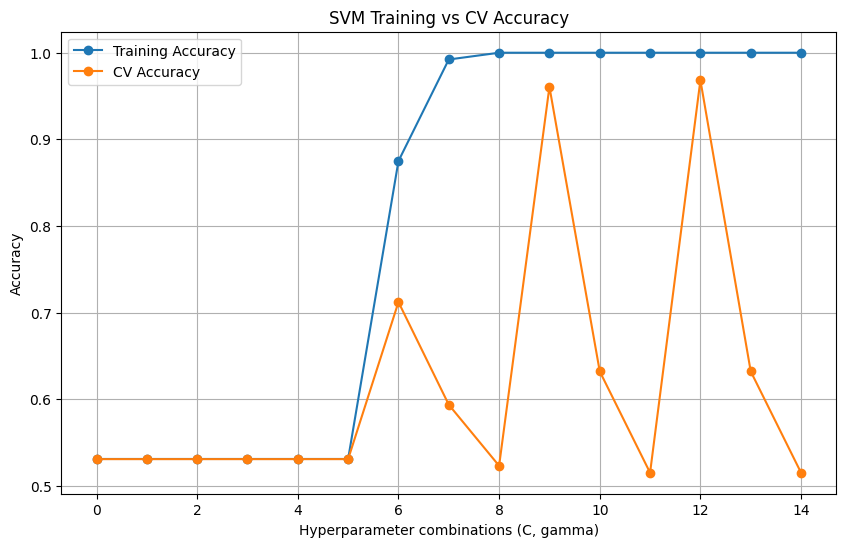

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# X and y are your features and labels
# Scale features first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Hyperparameter range to test
C_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1]

# Prepare arrays to store accuracies
train_acc_means = []
cv_acc_means = []

# Use StratifiedKFold for consistent splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for C in C_values:
    for gamma in gamma_values:
        svm = SVC(kernel='rbf', C=C, gamma=gamma)
        
        # Cross-validation accuracy
        cv_scores = cross_val_score(svm, X_scaled, labels, cv=cv)
        cv_mean = cv_scores.mean()
        cv_acc_means.append(cv_mean)
        
        # Fit on full dataset to estimate training accuracy
        svm.fit(X_scaled, labels)
        train_acc = svm.score(X_scaled, labels)
        train_acc_means.append(train_acc)
        
        print(f"C={C}, gamma={gamma} | Train={train_acc:.3f}, CV={cv_mean:.3f}")

# Convert lists to arrays for plotting
train_acc_means = np.array(train_acc_means)
cv_acc_means = np.array(cv_acc_means)

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(len(train_acc_means)), train_acc_means, marker='o', label='Training Accuracy')
plt.plot(range(len(cv_acc_means)), cv_acc_means, marker='o', label='CV Accuracy')
plt.xlabel('Hyperparameter combinations (C, gamma)')
plt.ylabel('Accuracy')
plt.title('SVM Training vs CV Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [125]:
df = pd.read_csv('Dataset.csv')

In [126]:
features = df.drop(columns=["label"])
labels = df["label"]

In [96]:
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

Features shape: (128, 401)
Labels shape: (128,)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, random_state=42, stratify=labels , shuffle=True
)

In [98]:
svm_poly = SVC(kernel='poly' , degree=2)
svm_poly.fit(X_train, y_train)
print("Accuracy:", svm_poly.score(X_train, y_train))

Accuracy: 0.5280898876404494


In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [101]:
svm_poly = SVC(kernel='poly' , degree=2)
svm_poly.fit(X_train_scaled_df, y_train)
print("Polynomial kernel of degree = 2")
print("Accuracy:", svm_poly.score(X_train_scaled_df, y_train))


Polynomial kernel of degree = 2
Accuracy: 0.7640449438202247


In [102]:
svm_poly = SVC(kernel='poly' , degree=4)
svm_poly.fit(X_train_scaled_df, y_train)
print("Polynomial kernel of degree = 4")
print("Accuracy:", svm_poly.score(X_train_scaled_df, y_train))

Polynomial kernel of degree = 4
Accuracy: 0.7528089887640449


In [103]:
svm_gamma_01 = SVC(kernel='rbf', gamma=1)
svm_gamma_01.fit(X_train_scaled_df, y_train)
print("Gamma = 1")
print("Accuracy:", svm_gamma_01.score(X_train_scaled_df, y_train))

Gamma = 1
Accuracy: 1.0


In [104]:
svm_gamma_01 = SVC(kernel='rbf', gamma=0.1)
svm_gamma_01.fit(X_train_scaled_df, y_train)
print("Gamma = 0.1")
print("Accuracy:", svm_gamma_01.score(X_train_scaled_df, y_train))


Gamma = 0.1
Accuracy: 1.0


In [105]:
svm_gamma = SVC(kernel='rbf', gamma=0.001)
svm_gamma.fit(X_train_scaled_df, y_train)
print("Gamma = 0.001")
print("Accuracy:", svm_gamma.score(X_train_scaled_df, y_train))

Gamma = 0.001
Accuracy: 0.7528089887640449


In [106]:
svm_gamma = SVC(kernel='rbf', gamma=0.0001)
svm_gamma.fit(X_train_scaled_df, y_train)
print("Gamma = 0.0001")
print("Accuracy:", svm_gamma.score(X_train_scaled_df, y_train))

Gamma = 0.0001
Accuracy: 0.5280898876404494


In [107]:
svm_c = SVC(kernel='rbf', C=0.1)
svm_c.fit(X_train_scaled_df, y_train)
print("c = 0.1")
print("Accuracy:", svm_c.score(X_train_scaled_df, y_train))

c = 0.1
Accuracy: 0.5280898876404494


In [108]:
svm_c = SVC(kernel='rbf', C=1)
svm_c.fit(X_train_scaled_df, y_train)
print("c = 1")
print("Accuracy:", svm_c.score(X_train_scaled_df, y_train))

c = 1
Accuracy: 0.9325842696629213


In [109]:
svm_c = SVC(kernel='rbf', C=10)
svm_c.fit(X_train_scaled_df, y_train)
print("c = 10")
print("Accuracy:", svm_c.score(X_train_scaled_df, y_train))

c = 10
Accuracy: 1.0


In [110]:
svm_c = SVC(kernel='rbf', C=100)
svm_c.fit(X_train_scaled_df, y_train)
print("c = 100")
print("Accuracy:", svm_c.score(X_train_scaled_df, y_train))

c = 100
Accuracy: 1.0


In [111]:
svm = SVC(kernel='rbf', C=0.1 , gamma=0.1)
svm.fit(X_train_scaled_df, y_train)
print("c = 0.1, gamma=0.1")
print("Accuracy:", svm.score(X_train_scaled_df, y_train))

c = 0.1, gamma=0.1
Accuracy: 0.5280898876404494


In [112]:
svm = SVC(kernel='rbf', C=0.1 , gamma=100)
svm.fit(X_train_scaled_df, y_train)
print("c = 0.1, gamma=100")
print("Accuracy:", svm.score(X_train_scaled_df, y_train))

c = 0.1, gamma=100
Accuracy: 0.5280898876404494


In [113]:
svm = SVC(kernel='rbf', C=10 , gamma=0.001)
svm.fit(X_train_scaled_df, y_train)
print("c = 10, gamma=0.001")
print("Accuracy:", svm.score(X_train_scaled_df, y_train))

c = 10, gamma=0.001
Accuracy: 1.0


In [114]:
svm = SVC(kernel='rbf', C=10, gamma=0.001)
svm.fit(X_train_scaled_df, y_train)
prediction=svm.predict(X_test_scaled_df)
print("c = 10, gamma=0.001")
print("Accuracy:", accuracy_score(y_test, prediction))

c = 10, gamma=0.001
Accuracy: 0.9743589743589743


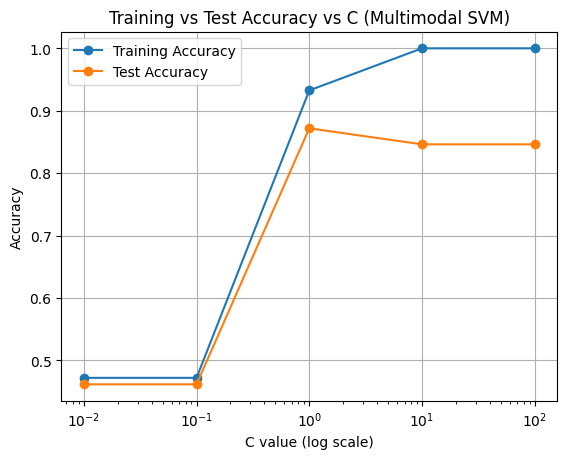

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

C_values = [0.01, 0.1, 1, 10, 100]

train_acc = []
test_acc = []

for C in C_values:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="rbf", C=C, gamma="scale", class_weight="balanced"))
    ])

    model.fit(X_train, y_train)

    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.plot(C_values, train_acc, marker='o', label="Training Accuracy")
plt.plot(C_values, test_acc, marker='o', label="Test Accuracy")

plt.xscale("log")
plt.xlabel("C value (log scale)")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy vs C (Multimodal SVM)")
plt.legend()
plt.grid(True)
plt.show()


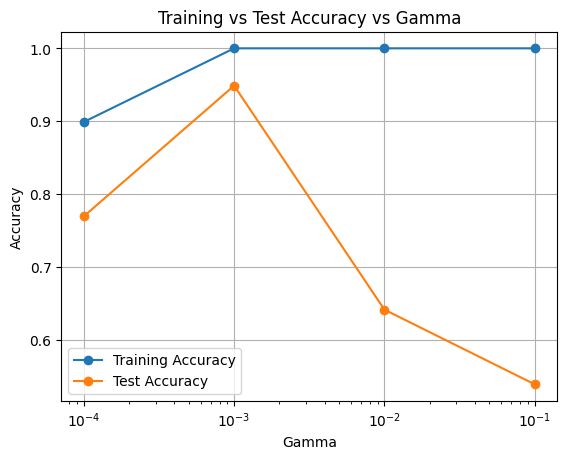

In [116]:
gamma_values = [1e-4, 1e-3, 1e-2, 1e-1]

train_acc = []
test_acc = []

for gamma in gamma_values:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="rbf", C=10, gamma=gamma, class_weight="balanced"))
    ])
    
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.plot(gamma_values, train_acc, marker='o', label="Training Accuracy")
plt.plot(gamma_values, test_acc, marker='o', label="Test Accuracy")

plt.xscale("log")
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy vs Gamma")
plt.legend()
plt.grid(True)
plt.show()


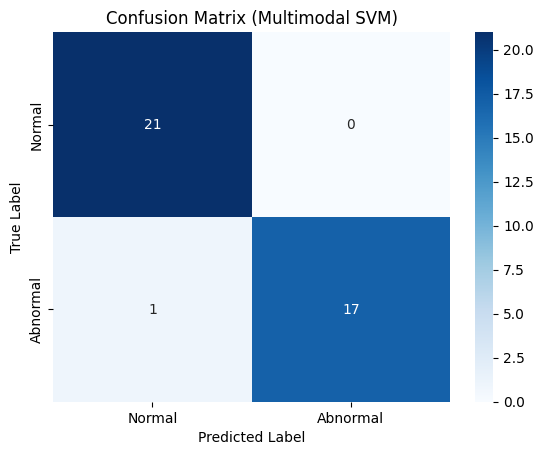

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Normal", "Abnormal"],
    yticklabels=["Normal", "Abnormal"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Multimodal SVM)")
plt.show()


In [118]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),   
    ("svm", SVC(probability=True))  
])

param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": ["scale", 0.01, 0.001, 0.0001,1],
    "svm__kernel": ["rbf" , "poly"]
}



model = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True
)

In [119]:
model.fit(X_train, y_train)

,estimator,Pipeline(step...ility=True))])
,param_grid,"{'svm__C': [0.1, 1, ...], 'svm__gamma': ['scale', 0.01, ...], 'svm__kernel': ['rbf', 'poly']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,copy,True


In [120]:
print("Best Parameters:", model.best_params_)

Best Parameters: {'svm__C': 100, 'svm__gamma': 0.0001, 'svm__kernel': 'rbf'}


In [121]:
train_acc=model.best_estimator_.score(X_train, y_train)
print("Training accuracy:", train_acc)

Training accuracy: 1.0


In [122]:
y_pred =model.best_estimator_.predict(X_test)

In [123]:
test_acc=accuracy_score(y_test, y_pred)
print(" Test Accuracy:", test_acc)


 Test Accuracy: 0.9743589743589743


In [124]:
print(classification_report(y_test, y_pred,labels=[0,1], target_names=['normal', 'abnormal']))


              precision    recall  f1-score   support

      normal       0.95      1.00      0.98        21
    abnormal       1.00      0.94      0.97        18

    accuracy                           0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39

